In [1]:
import cv2
import matplotlib.pyplot as plt
import math

135


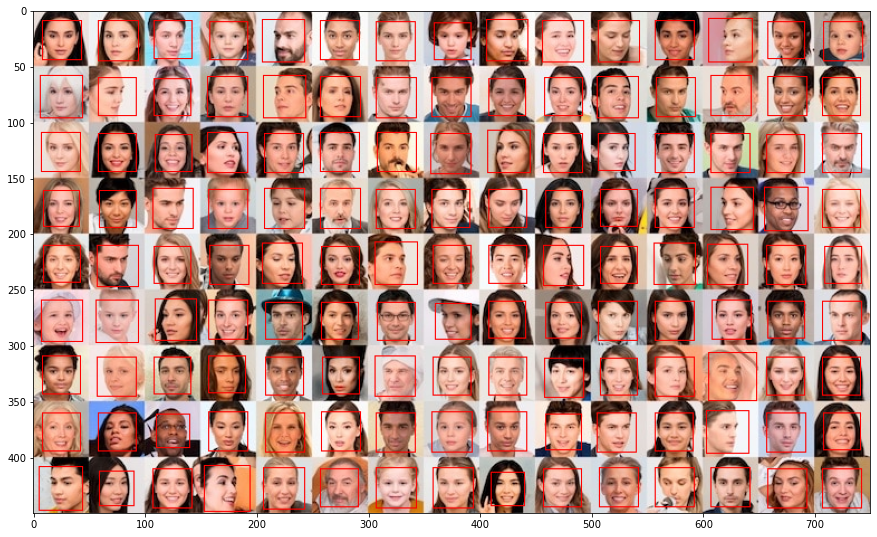

In [2]:
# Q1- Load the following image and detect as much as you can all faces
img = cv2.imread('faces.jpeg')
gray = cv2.imread('faces.jpeg',0)

classifier =  cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
faces = classifier.detectMultiScale(gray, scaleFactor = 1.013, minNeighbors = 5,
                                    minSize=(20,20), maxSize=(45,45))

for face in faces:
    x, y, w, h = face
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 1)

print(len(faces))
plt.figure(figsize=(15,15))
plt.imshow(img[:,:,::-1])

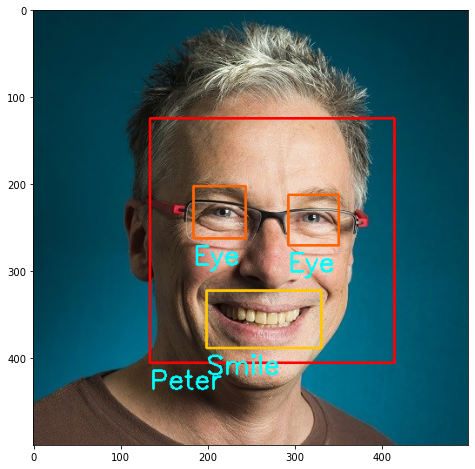

In [3]:
# Q2 Load the following image and detect faces,eye,smile and write under every
# detection label “Peter” ,”eye” ,”smile” as arranged.
img = cv2.imread('SmilingFace.jpg')
gray = cv2.imread('SmilingFace.jpg',0)
font = cv2.FONT_HERSHEY_SIMPLEX

face_classifier =  cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')
smile_classifier =  cv2.CascadeClassifier('haarcascades/haarcascade_smile.xml')

faces = face_classifier.detectMultiScale(gray, scaleFactor = 1.013, minNeighbors = 5,
                                         minSize=(20,20))
eyes = eye_classifier.detectMultiScale(gray, scaleFactor = 1.013, minNeighbors = 6,
                                      minSize=(50,50))
smiles = smile_classifier.detectMultiScale(gray, scaleFactor = 1.04, minNeighbors = 200,
                                           minSize=(50,50))

for face in faces:
    x, y, w, h = face
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
    cv2.putText(img, 'Peter', (x, y+h+30), font, 1, (255,255,0), 2)

for eye in eyes[[0,1]]:
    x, y, w, h = eye
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,100,255), 2)
    cv2.putText(img, 'Eye', (x, y+h+30), font, 1, (255,255,0), 2)

for smile in smiles:
    x, y, w, h = smile
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,200,255), 2)
    cv2.putText(img, 'Smile', (x, y+h+30), font, 1, (255,255,0), 2)

plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])

In [14]:
# Q3- Run your camera stream and make detection for faces,eye,smile and write
# under every detection label “me” ,”eye” ,”smile” as arranged.
# Make circle for eye and others rectangle
import time
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_SIMPLEX
while cap.isOpened():
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if ret:

        face_classifier =  cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
        eye_classifier = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')
        smile_classifier =  cv2.CascadeClassifier('haarcascades/haarcascade_smile.xml')

        faces = face_classifier.detectMultiScale(gray, scaleFactor = 1.013, minNeighbors = 5,
                                                minSize=(20,20))
        eyes = eye_classifier.detectMultiScale(gray, scaleFactor = 1.013, minNeighbors = 6,
                                            minSize=(50,50))
        smiles = smile_classifier.detectMultiScale(gray, scaleFactor = 1.04, minNeighbors = 200,
                                                minSize=(50,50))

        for face in faces:
            x, y, w, h = face
            cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
            cv2.putText(img, 'Me', (x, y+h+30), font, 1, (255,255,0), 2)

        for eye in eyes:
            x, y, w, h = eye
            r = int(math.sqrt((h/2)**2 + (w/2)**2))
            try:
                cv2.circle(img, (x+int(w/2), y+int(h/2)), r, (0,100,255), 2)
            except :
                break
            # cv2.rectangle(img, (x,y), (x+w, y+h), (0,100,255), 2)
            cv2.putText(img, 'Eye', (x, y+h+30), font, 1, (255,255,0), 2)

        for smile in smiles:
            x, y, w, h = smile
            cv2.rectangle(img, (x,y), (x+w, y+h), (0,200,255), 2)
            cv2.putText(img, 'Smile', (x, y+h+30), font, 1, (255,255,0), 2)

        cv2.imshow('Camera', img)
        k = cv2.waitKey(1)
        if k == ord('q'):
            break

        # time.sleep(0.5)
    else:
        break
print('Destroying....')
cap.release()
cv2.destroyAllWindows()

Destroying....


: 